# Analyse exploratoire des données
## Classification ascendante hiérarchique

La classification ascendante hiérarchique est une méthode d'analyse statistique multivariée qui permet de regrouper des individus ou des variables similaires en classes ou en clusters. Cette méthode consiste à calculer des distances entre chaque paire d'individus ou de variables, puis à regrouper les plus proches en premier lieu. Ce processus se répète jusqu'à ce que tous les individus ou les variables soient regroupés en une hiérarchie de clusters.

Dans notre étude nous allons regrouper les pays en fonction de leurs similarités suivants les variables qui les composent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lecture du dataset
dataset = pd.read_csv("C:\\Users\open_\P9_Produisez_une_étude_de_marché\dataset_p9.csv")
display(dataset.head())
display(dataset.shape)

,Zone,Dispo. alim. volaille (Kcal/pers/jour),Production volaille,%Evolution population 2016/2017,Population totale (1000 pers.),Stabilité politique (indice),PIB US $,PIB US $ par habitant
0,Afghanistan,5.0,28.0,2.58,35643.418,-2.80,1.889635e+04,530.149831
1,Afrique du Sud,143.0,1667.0,1.43,56641.209,-0.28,3.808514e+05,6723.928582
2,Albanie,85.0,13.0,-0.08,2879.355,0.38,1.301973e+04,4521.752219
3,Algérie,22.0,275.0,2.07,41136.546,-0.92,1.700970e+05,4134.936054
4,Allemagne,71.0,1514.0,0.57,82624.374,0.59,3.690849e+06,44670.222288


(168, 8)

In [3]:
# Index du dataframe par les pays
data = dataset.set_index("Zone")
data.head()

,Dispo. alim. volaille (Kcal/pers/jour),Production volaille,%Evolution population 2016/2017,Population totale (1000 pers.),Stabilité politique (indice),PIB US $,PIB US $ par habitant
Zone,,,,,,,
Afghanistan,5.0,28.0,2.58,35643.418,-2.80,1.889635e+04,530.149831
Afrique du Sud,143.0,1667.0,1.43,56641.209,-0.28,3.808514e+05,6723.928582
Albanie,85.0,13.0,-0.08,2879.355,0.38,1.301973e+04,4521.752219
Algérie,22.0,275.0,2.07,41136.546,-0.92,1.700970e+05,4134.936054
Allemagne,71.0,1514.0,0.57,82624.374,0.59,3.690849e+06,44670.222288


In [4]:
# Extraction des valeurs du data-set
X = data.values
X

array([[ 5.00000000e+00,  2.80000000e+01,  2.58000000e+00, ...,
        -2.80000000e+00,  1.88963520e+04,  5.30149831e+02],
       [ 1.43000000e+02,  1.66700000e+03,  1.43000000e+00, ...,
        -2.80000000e-01,  3.80851444e+05,  6.72392858e+03],
       [ 8.50000000e+01,  1.30000000e+01, -8.00000000e-02, ...,
         3.80000000e-01,  1.30197299e+04,  4.52175222e+03],
       ...,
       [ 2.19000000e+02,  2.19140000e+04,  6.40000000e-01, ...,
         2.90000000e-01,  1.94773370e+07,  5.90595964e+04],
       [ 0.00000000e+00,  1.40000000e+01,  2.70000000e+00, ...,
        -1.68000000e+00,  7.67946861e+04,  7.09761008e+02],
       [ 1.80000000e+01,  0.00000000e+00,  2.68000000e+00, ...,
         2.00000000e-01,  1.46979045e+03,  2.28358112e+03]])

In [5]:
# Centrage et réduction des données
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
display(X_scaled)
display(X_scaled.shape)

# Vérification de la moyenne =0 et de l'écart type =1
pd.DataFrame(X_scaled).describe().round(2).iloc[1:3,:]

array([[-1.13378921, -0.28656772,  1.13901774, ..., -3.03992675,
        -0.23678192, -0.6899553 ],
       [ 1.15272515,  0.49663773,  0.12669725, ..., -0.2341464 ,
        -0.01305983, -0.36916968],
       [ 0.19172636, -0.29373555, -1.20252356, ...,  0.50070083,
        -0.24041422, -0.48322388],
       ...,
       [ 2.41196494, 10.17178154, -0.56872291, ...,  0.40049439,
        11.79035348,  2.3413775 ],
       [-1.21663393, -0.2932577 ,  1.24465119, ..., -1.79291326,
        -0.20099534, -0.68065295],
       [-0.91839293, -0.29994767,  1.22704561, ...,  0.30028795,
        -0.24755316, -0.59914231]])

(168, 7)

,0,1,2,3,4,5,6
mean,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
# Inertie des valeurs
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_scaled, method="ward")
Z = pd.DataFrame(Z)
Z.head()

,0,1,2,3
0,28.0,39.0,0.100268,2.0
1,87.0,89.0,0.108734,2.0
2,60.0,124.0,0.110207,2.0
3,23.0,99.0,0.116500,2.0
4,57.0,95.0,0.134740,2.0


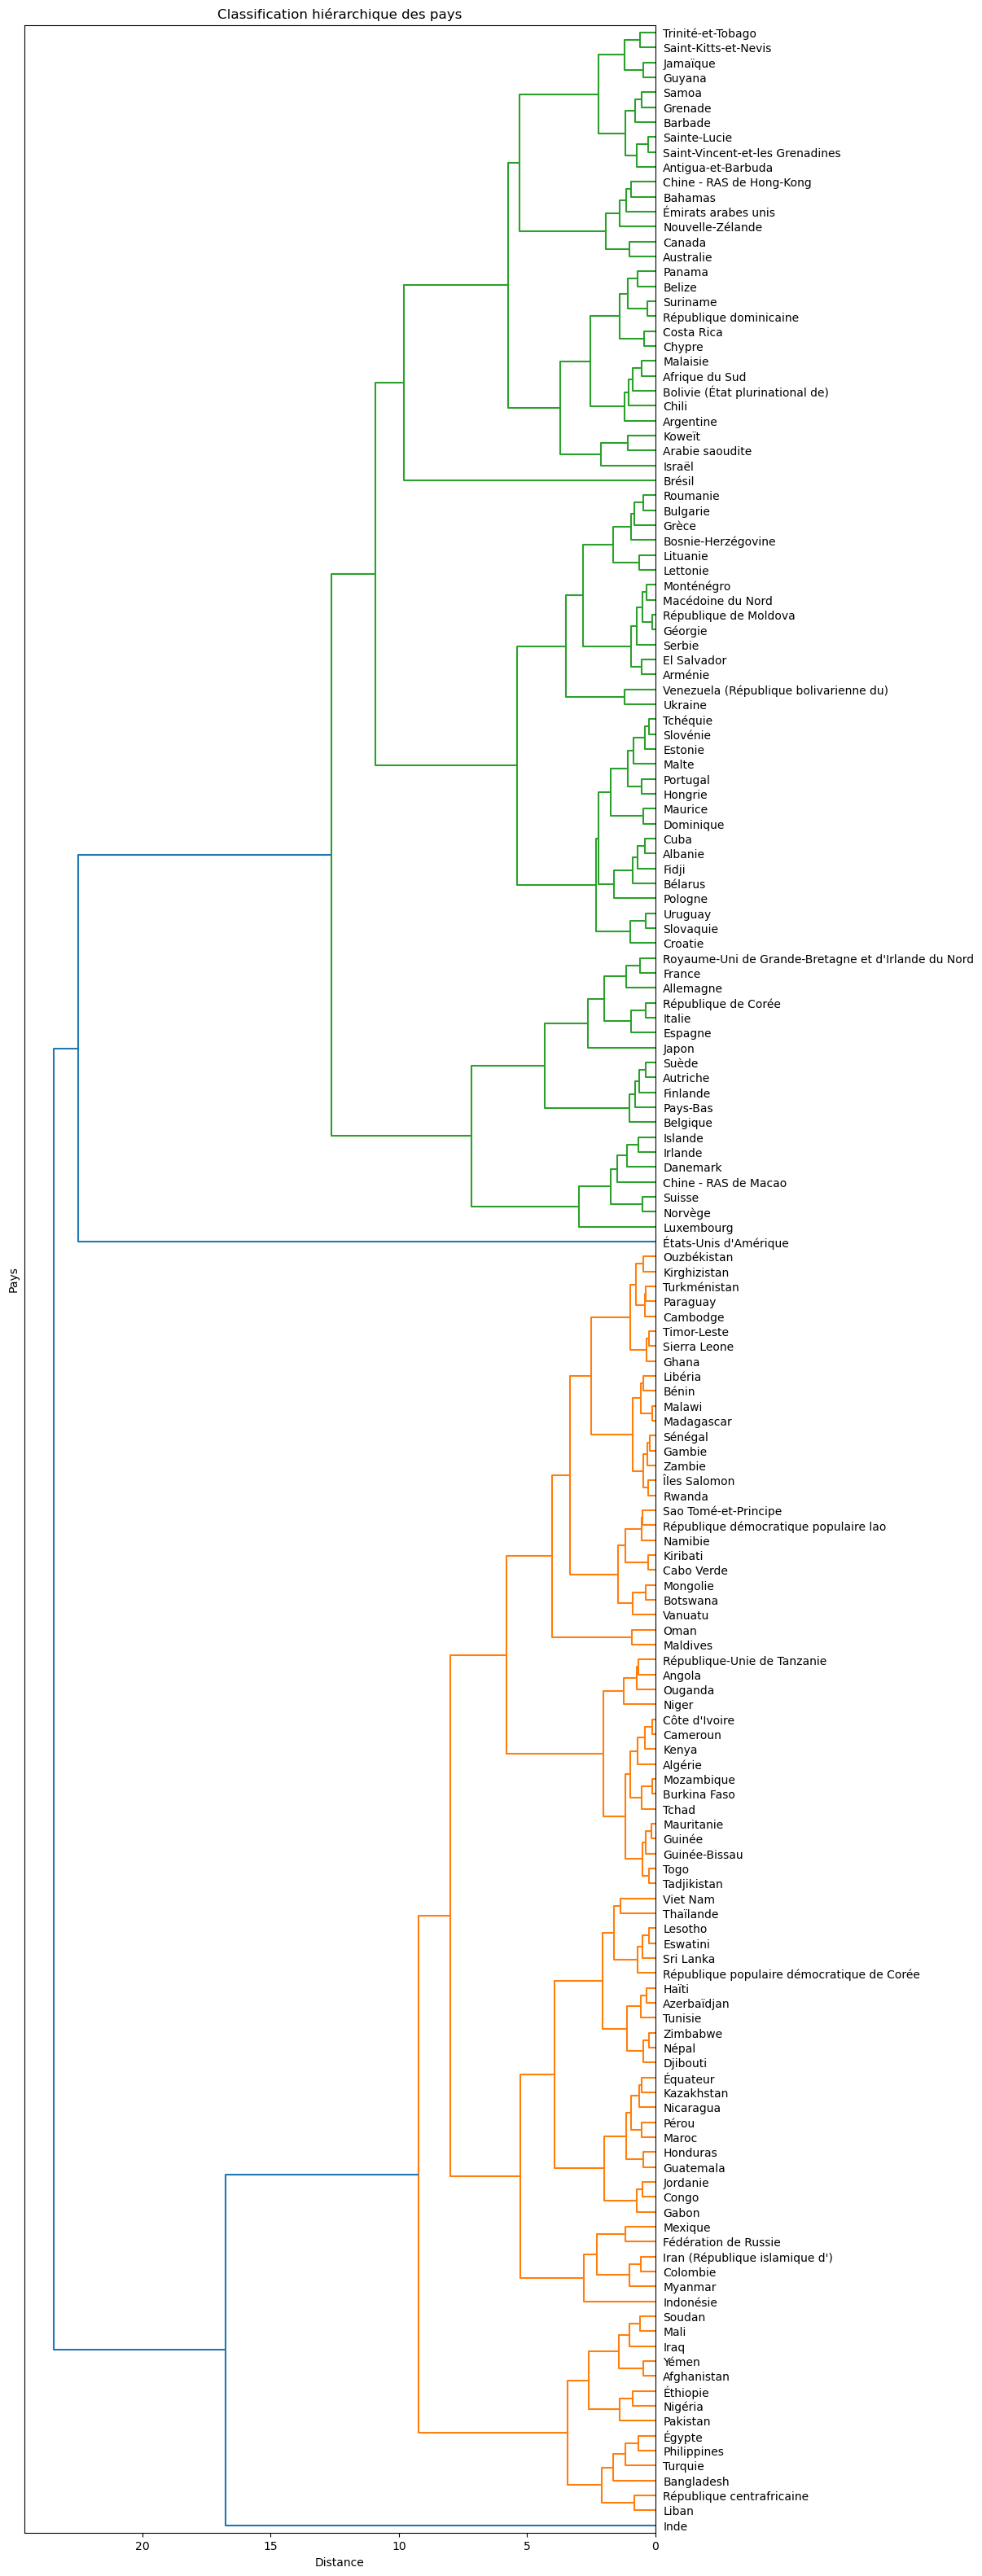

In [7]:
# Représentation graphique de la classification hiérarchique

fig, ax = plt.subplots(1,1,figsize=(10,40))

zone = dataset["Zone"].values

_=dendrogram(Z, labels=zone, ax=ax, orientation="left")

ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
ax.set_title("Classification hiérarchique des pays")
ax.tick_params(axis="x", which="major", labelsize=10)
ax.tick_params(axis="y", which="major", labelsize=10)

plt.show()

# Méthode des K-means
La méthode k-means est une technique d'analyse de données non supervisée utilisée pour regrouper des observations en k clusters distincts en fonction de leurs similarités. Cette méthode implique l'affectation d'un point à un cluster en fonction de la distance entre les coordonnées du point et les coordonnées du centroïde du cluster le plus proche.

In [8]:
# Classification en composante principale
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

In [9]:
# Matrice de l'ACP
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns=["PC1","PC2","PC3", "PC4","PC5","PC6","PC7"])
display(X_proj.head())
X_proj.shape

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.444430,1.897962,-0.246078,-0.513225,-0.202661,1.567008,-0.200441
1,0.444567,0.275941,0.306806,-0.783507,0.904142,0.068700,0.116347
2,0.184580,-0.823153,1.079990,-0.178959,-0.399372,-0.346533,-0.073316
3,-1.264759,0.822926,-0.233494,-0.002883,-0.182322,0.193649,-0.033693
4,2.284131,0.326641,-0.689737,0.822512,-0.872978,0.166962,-0.839770


(168, 7)

In [10]:
# Méthode des K-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
labels = kmeans.labels_
labels

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 3, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1])

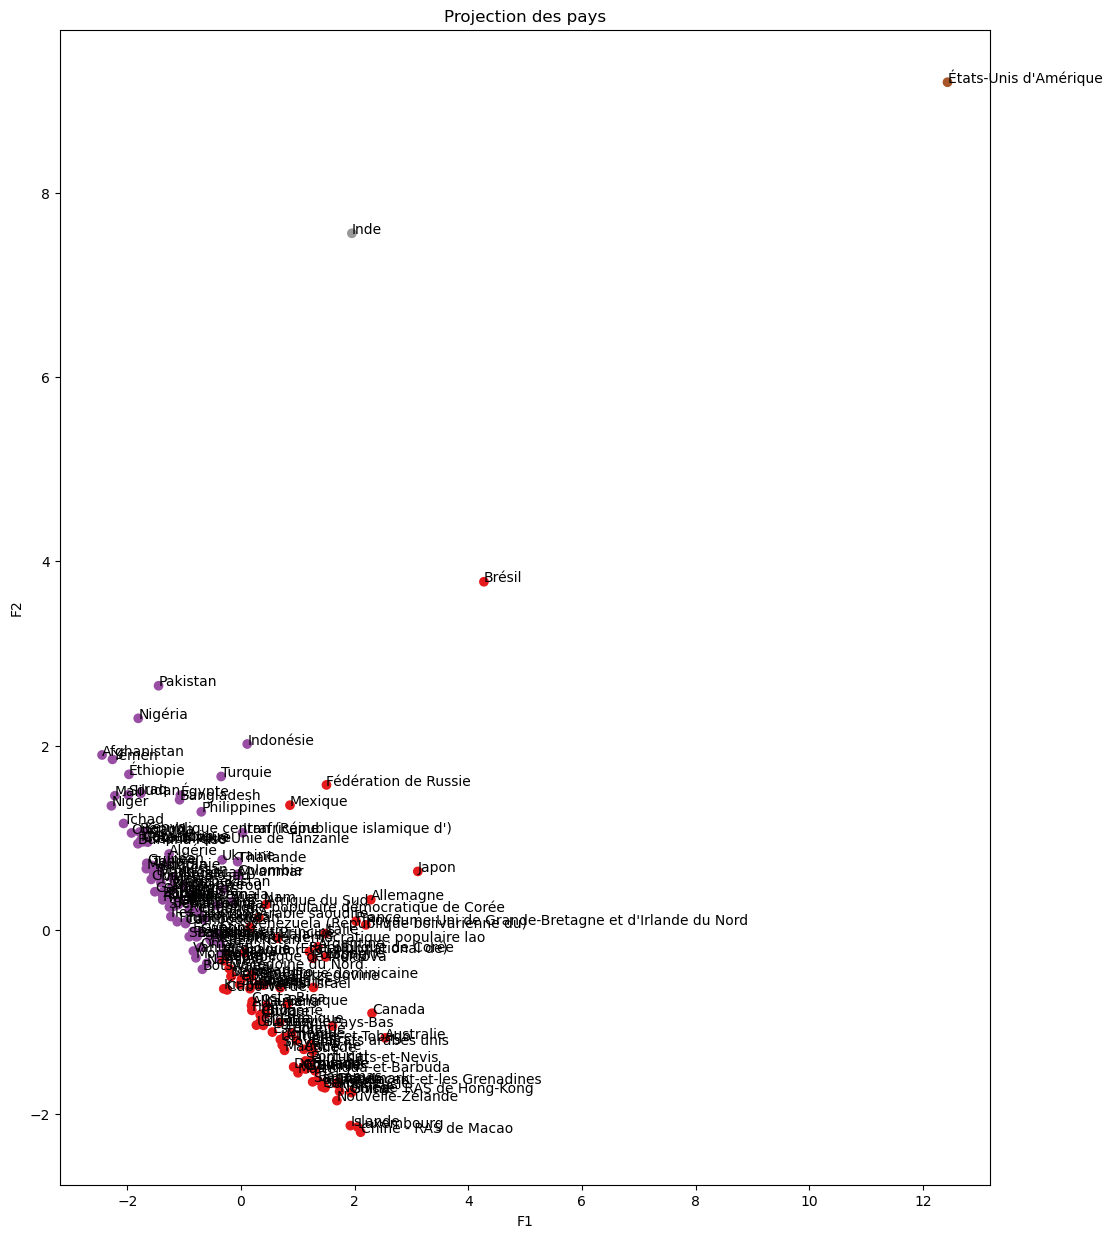

In [11]:
# Représentation graphique du clustering
fig, ax = plt.subplots(1,1,figsize=(12,15))

ax.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=labels, cmap="Set1")

for i, (x, y) in enumerate(zip(X_proj.iloc[:,0],
                               X_proj.iloc[:,1])):
    plt.text(x, y, data.index[i])

ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_title("Projection des pays")
plt.show()

## Exclusion des outliers
Nous utiliserons le dataset1 qui exclut les outliers Brésil, Inde et États-Unis d'Amérique.

In [12]:
# Exclusion des outliers dans un nouveau dataset (Pays exclus : Brésil, Inde, États-Unis d'Amérique)
dataset1 = pd.read_csv("C:\\Users\open_\P9_Produisez_une_étude_de_marché\dataset1_p9.csv")

# Index du dataframe par les pays
data = dataset1.set_index("Zone")

# Extraction des valeurs du data-set
X = data.values

# Centrage et réduction des données
X_scaled = scaler.fit_transform(X)
display(X_scaled)
display(X_scaled.shape)

array([[-1.14358157, -0.52841253,  1.12354616, ..., -3.0261523 ,
        -0.38870957, -0.68684835],
       [ 1.2063284 ,  1.80761409,  0.11867774, ..., -0.23760959,
         0.1880589 , -0.36318728],
       [ 0.21868508, -0.54979167, -1.20075819, ...,  0.49272302,
        -0.39807385, -0.47826384],
       ...,
       [ 0.18462841, -0.08372656,  0.42450726, ..., -0.00523103,
        -0.25262709, -0.38814071],
       [-1.22872324, -0.54836639,  1.228402  , ..., -1.78679998,
        -0.29644969, -0.67746262],
       [-0.92221324, -0.56832025,  1.21092603, ...,  0.2935414 ,
        -0.41647846, -0.59522133]])

(165, 7)

In [13]:
# Classification en composante principale
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(X_scaled)

PCA(n_components=7)

In [14]:
# Matrice de l'ACP
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns=["PC1","PC2","PC3", "PC4","PC5","PC6","PC7"])
display(X_proj.head())
X_proj.shape

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.892043,1.205261,0.156105,0.141439,-0.985617,-1.363481,-0.106612
1,0.800880,1.458015,-0.927439,1.277759,0.212649,0.226063,0.480677
2,0.258923,-1.031327,-1.008394,-0.713038,0.130411,0.077477,-0.195946
3,-1.391769,0.699944,0.269343,-0.101967,-0.146981,-0.112898,-0.078516
4,3.958774,3.395088,2.088707,-1.068519,1.350677,-1.323135,-1.304920


(165, 7)

In [15]:
# Méthode des K-means
kmeans = KMeans()
kmeans.fit(X_scaled)
labels = kmeans.labels_
labels

array([0, 3, 5, 0, 2, 0, 1, 1, 3, 5, 4, 4, 6, 1, 7, 1, 4, 6, 1, 5, 6, 5,
       0, 5, 6, 6, 6, 0, 2, 1, 1, 4, 5, 3, 6, 5, 5, 5, 0, 4, 6, 1, 5, 2,
       5, 6, 5, 4, 2, 3, 6, 6, 6, 1, 5, 6, 0, 6, 1, 5, 6, 6, 5, 7, 3, 0,
       4, 4, 1, 2, 1, 2, 6, 6, 0, 6, 6, 1, 6, 5, 0, 6, 5, 4, 5, 6, 3, 6,
       6, 0, 5, 6, 5, 0, 3, 6, 5, 0, 3, 6, 6, 0, 7, 4, 4, 6, 6, 0, 6, 7,
       1, 6, 4, 3, 3, 5, 3, 5, 2, 6, 0, 2, 5, 1, 6, 6, 0, 1, 1, 1, 1, 6,
       5, 6, 5, 5, 0, 5, 4, 5, 4, 6, 6, 0, 5, 3, 6, 0, 1, 6, 6, 3, 3, 5,
       6, 5, 3, 0, 6, 6, 3, 4, 6, 0, 6])

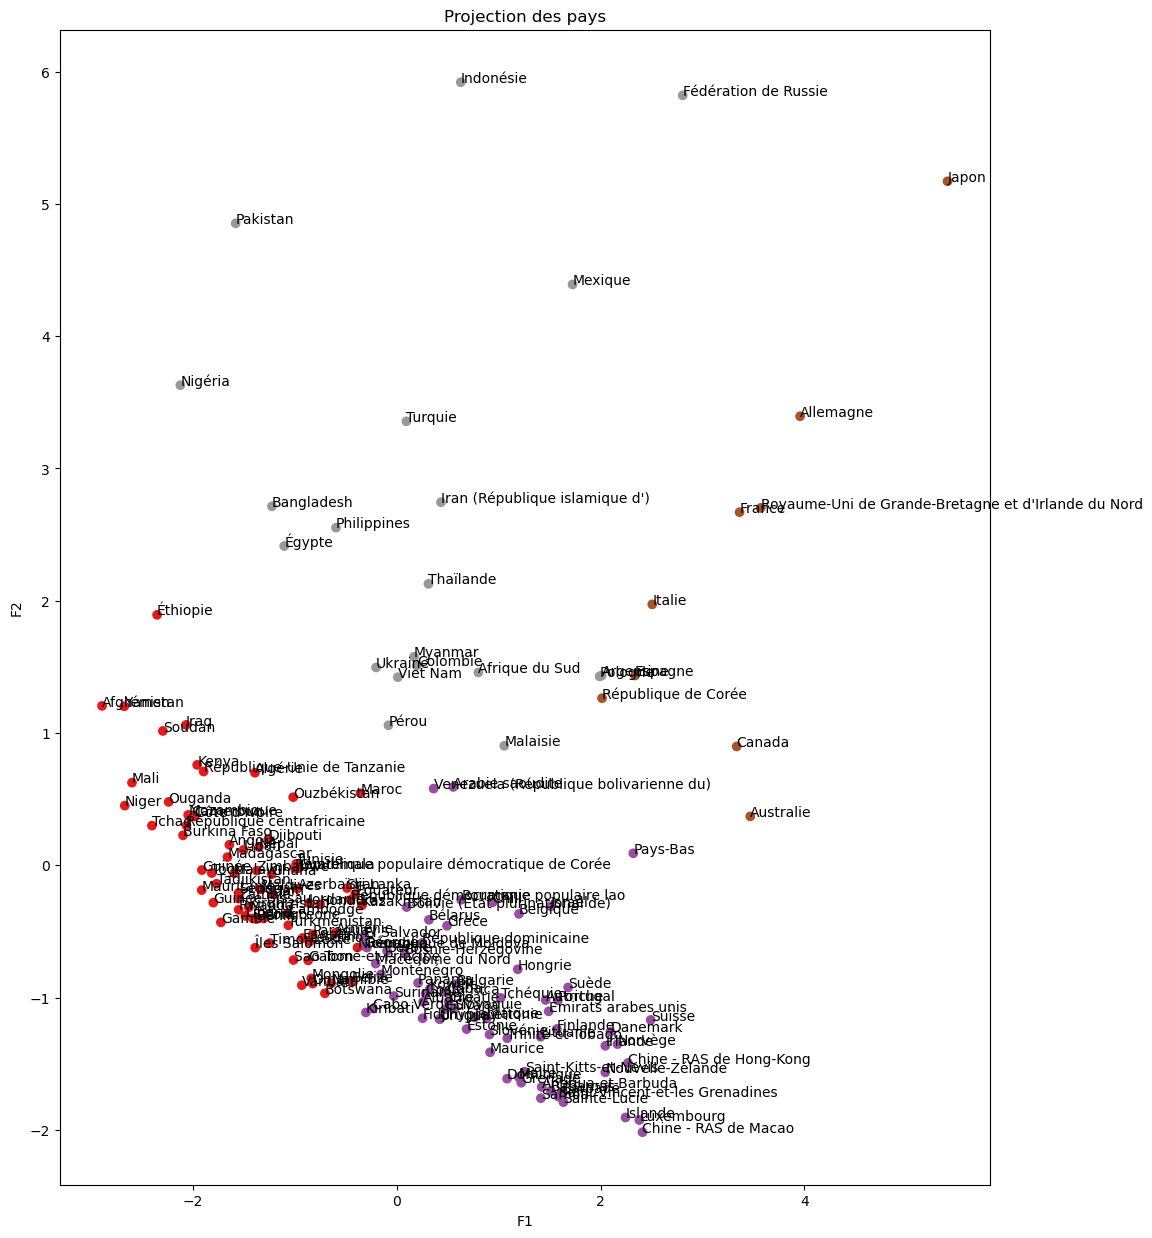

In [62]:
# Représentation graphique du clustering
fig, ax = plt.subplots(1,1,figsize=(12,15))

ax.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=labels, cmap="Set1")

for i, (x, y) in enumerate(zip(X_proj.iloc[:,0],
                               X_proj.iloc[:,1])):
    plt.text(x, y, data.index[i])

ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_title("Projection des pays")
plt.show()

**La projection à partir du dataset1, sans les outliers, est plus aérée.**

In [17]:
# Inertie des valeurs
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_scaled, method="ward")
Z = pd.DataFrame(Z)
Z.head()

,0,1,2,3
0,27.0,38.0,0.108162,2.0
1,59.0,122.0,0.120659,2.0
2,85.0,87.0,0.230826,2.0
3,56.0,93.0,0.231331,2.0
4,45.0,78.0,0.242179,2.0


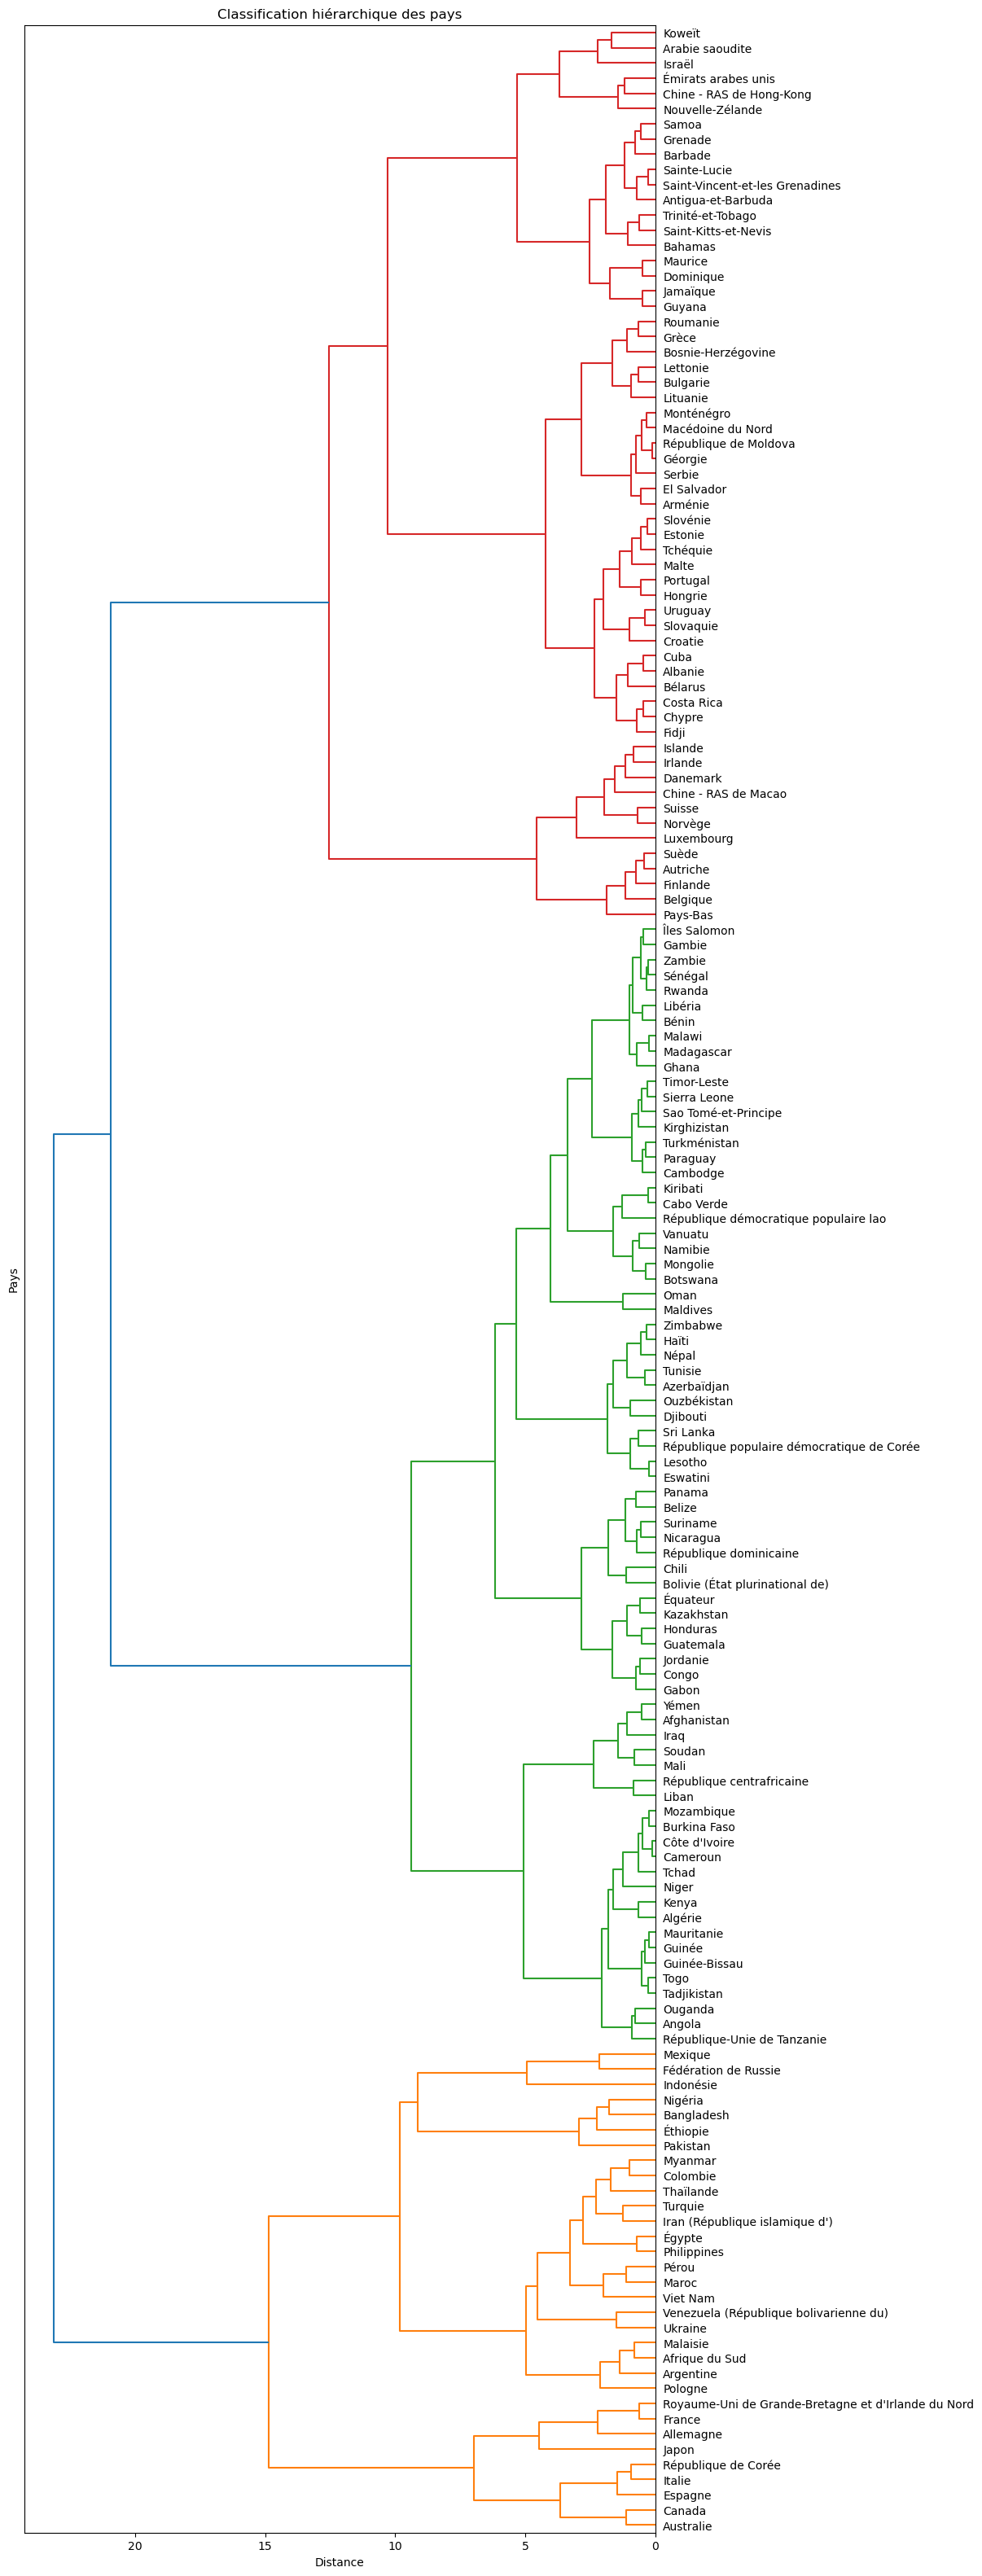

In [64]:
zone = dataset1["Zone"].values

# Représentation graphique de la classification hiérarchique

fig, ax = plt.subplots(1,1,figsize=(10,40))

_=dendrogram(Z, labels=zone, ax=ax, orientation="left")

ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
ax.set_title("Classification hiérarchique des pays")
ax.tick_params(axis="x", which="major", labelsize=10)
ax.tick_params(axis="y", which="major", labelsize=10)

plt.show()

Le dendrogramme laisse apparaître 3 grand groupes. Voyons s'ils sont optimaux en testant les valeurs grâce au score elbow, au coefficient de silhouette et à l'indice de Davies Bouldin.

In [66]:
# Inertie des clusters ou calcul de la somme des carrés des distances
from sklearn.cluster import KMeans

inertia_list =[]

k_list = range(1,10)

for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

C:\Users\open_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


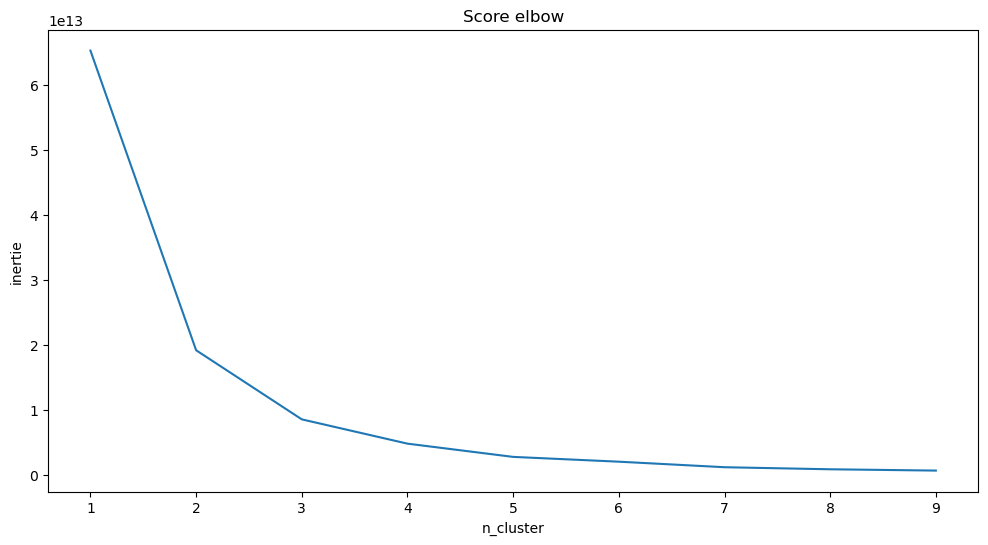

In [69]:
# Représentation graphique du score elbow
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("inertie")
ax.set_xlabel("n_cluster")
ax.set_title("Score elbow")
ax = plt.plot(k_list, inertia_list)

plt.show()

Le score elbow présente sa cassure du coude au niveau des clusters 2 et 3. Vérifions ce résultat grâce au coefficient de silhouette.

In [21]:
# Fonction qui affiche les résultats du coefficient de silhouette en fonction du nombre de clusters testés
from sklearn.metrics import silhouette_score

def kmeans_results(X):
     
    # Test des résultats pour n_clusters compris entre 2 et 10
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k).fit(X_scaled)
        inertia = kmeans.inertia_
        silhouette_coefficient = np.mean(silhouette_score(X_scaled, kmeans.labels_))
        print(f"Nombre de clusters : {k}")
        print(f"Inertie : {inertia:.2f}")
        print(f"Coefficient de silhouette : {silhouette_coefficient:.2f}\n")
        
kmeans_results(X)

Nombre de clusters : 2
Inertie : 865.01
Coefficient de silhouette : 0.28

Nombre de clusters : 3
Inertie : 640.35
Coefficient de silhouette : 0.30

Nombre de clusters : 4
Inertie : 538.19
Coefficient de silhouette : 0.33

Nombre de clusters : 5
Inertie : 451.86
Coefficient de silhouette : 0.32

Nombre de clusters : 6
Inertie : 397.40
Coefficient de silhouette : 0.31

Nombre de clusters : 7
Inertie : 355.41
Coefficient de silhouette : 0.31

Nombre de clusters : 8
Inertie : 305.69
Coefficient de silhouette : 0.29

Nombre de clusters : 9
Inertie : 277.97
Coefficient de silhouette : 0.30

Nombre de clusters : 10
Inertie : 251.36
Coefficient de silhouette : 0.30



Le coefficient de silhouette exprime le nombre optimal de clusters. Il évolue entre -1 et 1. 1 représentant la meilleure stabilité du cluster.
Nous constatons que le coefficient de silhouette est le plus fort pour une représentation en 4 clusters avec 0.33.
Nous segmenterons donc notre jeu de données en 4 clusters.

In [22]:
# Méthode des K-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
labels = kmeans.labels_
labels

array([0, 3, 1, 0, 2, 0, 1, 1, 3, 0, 2, 1, 0, 1, 3, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 3, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2,
       1, 0, 1, 1, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 3, 3, 0,
       1, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 3, 0,
       0, 0, 1, 0, 1, 0, 3, 0, 1, 0, 3, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 3,
       1, 0, 1, 3, 3, 1, 3, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 3, 3, 1,
       0, 1, 3, 0, 0, 0, 3, 1, 0, 0, 0])

In [23]:
# Indice de Davies Bouldin
from sklearn.metrics import davies_bouldin_score

score = davies_bouldin_score(X_scaled, labels)
print("L'indice de Davies-Bouldin est :", score)

L'indice de Davies-Bouldin est : 1.0879132424126037


L'indice de Davies-Bouldin exprime la moyenne du rapport maximal entre la distance d'un point au centre de son groupe et la distance entre deux centres de groupes. L'indice varie entre 0 (meilleure classification) et + l'infini (pire classification).
Notre indice est proche de 1 ce qui démontre une bonne classification.

In [24]:
# Création d'une fonction pour la projection des valeurs en clusters sur un plan à 2 dimensions

def display_factorial_planes(   X_proj, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="o" ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_proj)
    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker)
        
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if labels :         
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y, labels[i], fontsize='14', ha='center',va='center') 

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None: 
        plt.legend()
    plt.show()


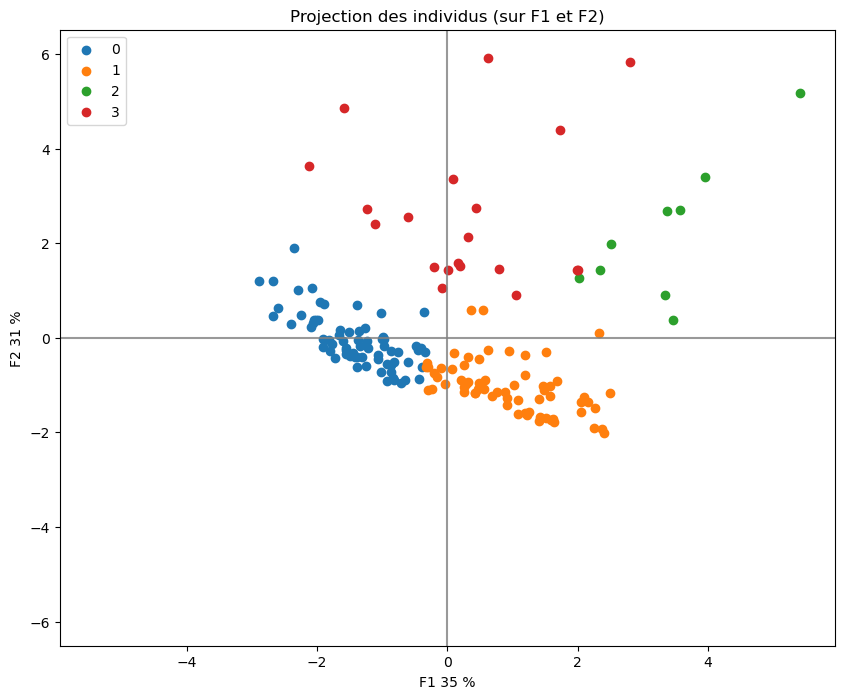

In [25]:
display_factorial_planes(X_proj,  
                         x_y=(0,1), 
                         clusters=labels, 
                         pca=pca, 
                         figsize=(10, 8), 
                         alpha=1 )

# Calcul des centroïdes


In [26]:
# Calcul des centroides
centroids = kmeans.cluster_centers_
centroids.shape

(4, 7)

In [27]:
# Calcul des centroides centrés et réduits
centroids_scaled = scaler.fit_transform(centroids)
centroids_scaled.shape

(4, 7)

In [28]:
# Calcul des centroides en fonction du nombre de clusters définis
centroids_proj = pca.transform(centroids_scaled)
centroids_proj = pd.DataFrame(centroids_proj, columns=["F1","F2","F3", "F4", "F5","F6","F7"], index=["cluster_0", "cluster_1", "cluster_2", "cluster_3"])
centroids_proj

,F1,F2,F3,F4,F5,F6,F7
cluster_0,-2.755067,-0.545045,0.810118,-0.170110,0.540568,-0.205431,0.156605
cluster_1,0.794766,-2.050677,-0.508045,-0.009527,-0.156361,0.018298,-0.205370
cluster_2,2.712843,0.653300,0.588088,-0.257278,0.055049,-0.131965,-0.161244
cluster_3,-0.752541,1.942422,-0.890160,0.436915,-0.439255,0.319097,0.210009


In [29]:
# Calcul des centroides pour chaque variable
centroids_proj = scaler.transform(centroids)
centroids_proj = pd.DataFrame(centroids_proj)
centroids_proj

,0,1,2,3,4,5,6
0,-1.608952,-1.025440,1.583417,-0.786078,-0.724254,-0.761943,-1.030123
1,0.957097,-0.962689,-0.825374,-1.073348,0.954436,-0.654755,0.382511
2,0.701946,0.843440,-0.890994,0.429076,1.011411,1.705149,1.460211
3,-0.050091,1.144689,0.132951,1.430350,-1.241594,-0.288451,-0.812598


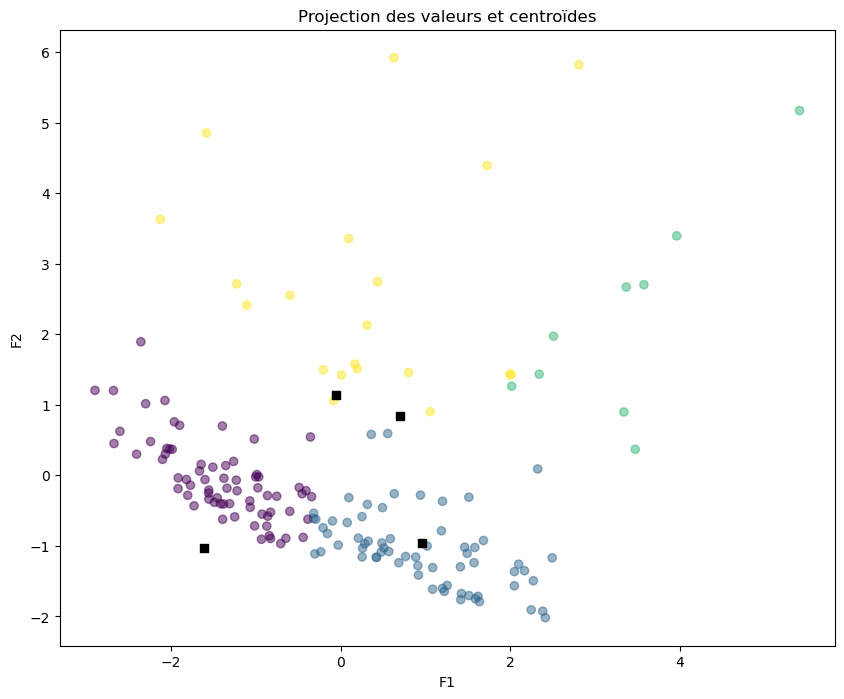

In [30]:
# Projection des valeurs en clusters et des centroides (carrés noirs)
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=labels, cmap="viridis", alpha=0.5)
ax.scatter(centroids_proj.iloc[:,0], centroids_proj.iloc[:,1], c="black", marker="s")
ax.set_xlabel("F1")
ax.set_ylabel("F2")

ax.set_title("Projection des valeurs et centroïdes")

plt.show()

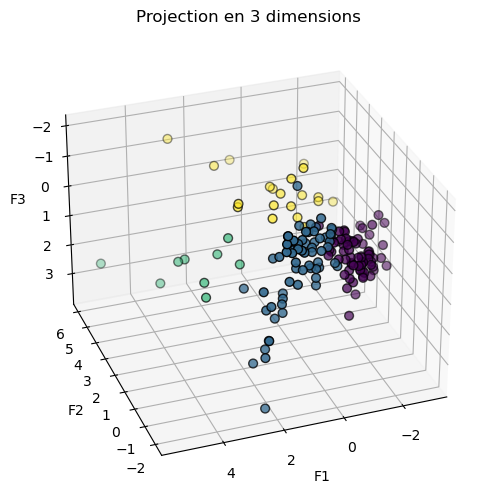

In [31]:
# Représentation en 3 dimensions

fig = plt.figure(1, figsize=(8,6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    X_proj.iloc[:,0],
    X_proj.iloc[:,1],
    X_proj.iloc[:,2],
    c=labels, cmap="viridis", edgecolor="k", s=40)

ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")
ax.set_title("Projection en 3 dimensions")

plt.show()

# Analyse en composantes principales (ACP)
L'Analyse en composantes principales est une méthode statistique de réduction de la dimensionnalité qui permet de transformer un grand nombre de variables en un petit nombre de variables non corrélées appelées "composantes principales". 

L'objectif principal de l'ACP est de simplifier la structure des données en identifiant les variables qui sont les plus importantes pour expliquer la variabilité observée dans les données. Elle permet également de visualiser les relations entre les variables et les observations.

In [32]:
# Récupération des valeurs, des lignes et des colonnes
X = data.values
names = data.index
features = data.columns

# Centrage et réduction des données
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
display(X_scaled)

# Vérification de la moyenne =0 et de l'écart type =1
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().loc[idx,:].round(2)

array([[-1.14358157, -0.52841253,  1.12354616, ..., -3.0261523 ,
        -0.38870957, -0.68684835],
       [ 1.2063284 ,  1.80761409,  0.11867774, ..., -0.23760959,
         0.1880589 , -0.36318728],
       [ 0.21868508, -0.54979167, -1.20075819, ...,  0.49272302,
        -0.39807385, -0.47826384],
       ...,
       [ 0.18462841, -0.08372656,  0.42450726, ..., -0.00523103,
        -0.25262709, -0.38814071],
       [-1.22872324, -0.54836639,  1.228402  , ..., -1.78679998,
        -0.29644969, -0.67746262],
       [-0.92221324, -0.56832025,  1.21092603, ...,  0.2935414 ,
        -0.41647846, -0.59522133]])

,0,1,2,3,4,5,6
mean,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [33]:
# Définition du nombre de composantes
n_components = 7
pca = PCA()
pca.fit(X_scaled)

# Calcul de la distribution des valeurs parmi les composantes
pca.explained_variance_ratio_

# En pourcentage
scree = (pca.explained_variance_ratio_*100).round(2)
print("En pourcentage :", scree)

# Cumulée
scree_cum = scree.cumsum().round(2)
print("\nCumulée :", scree_cum)

En pourcentage : [34.93 31.15 11.96  8.79  5.39  4.35  3.44]

Cumulée : [ 34.93  66.08  78.04  86.83  92.22  96.57 100.01]


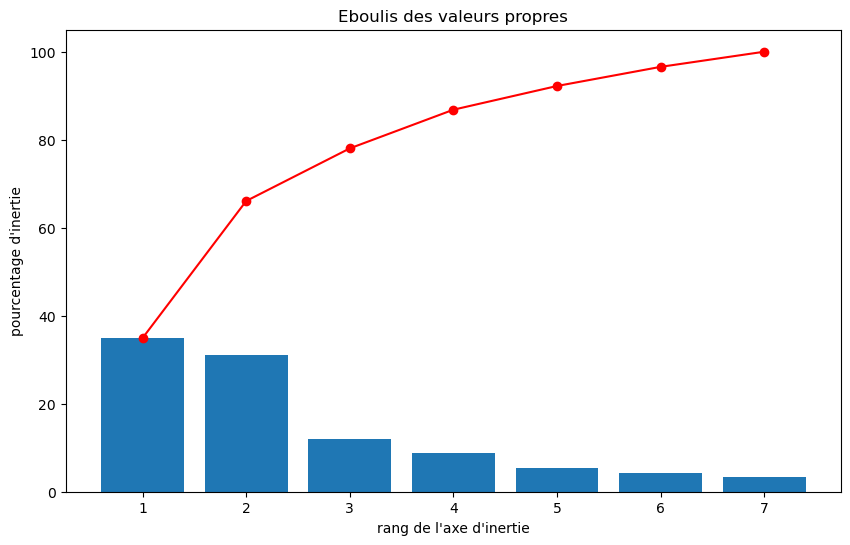

In [34]:
# Eboulis des valeurs propres
x_list = range(1, n_components+1)

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.bar(x_list, scree)
ax.plot(x_list, scree_cum, c="red", marker="o")
ax.set_xlabel("rang de l'axe d'inertie")
ax.set_ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On observe que les valeurs sont principalement distribuées entre 4 composantes principales qui expliquent 90% du jeu de données, ce qui est convenable.

La 1ère composante représente environ 35% des valeurs, la 2ème pratiquement 35%, et la somme cumulée des 2 premières composantes représente environ 70%.

In [35]:
# Définition du nouveau nombre de composantes
n_components = 4
pca = PCA(n_components = n_components)
pca.fit(X_scaled)

# Matrice des valeurs
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,0.432731,0.280207,-0.414257,0.025364,0.435290,0.394120,0.466013
1,-0.168653,0.532307,0.074429,0.609117,-0.368585,0.400295,-0.124706
2,-0.402677,-0.171782,0.591330,-0.009133,0.179045,0.307143,0.576363
3,0.717703,0.188971,0.640250,0.015483,-0.094815,-0.171906,0.022178


In [36]:
# Table des composantes et valeurs grâce à une transposition
x_list = range(1, n_components+1)

pcs.columns = features
pcs.index = ["F"+ str(i) for i in x_list]
pcs.round(2)
pcs_table = pcs.T
pcs_table

,F1,F2,F3,F4
Dispo. alim. volaille (Kcal/pers/jour),0.432731,-0.168653,-0.402677,0.717703
Production volaille,0.280207,0.532307,-0.171782,0.188971
%Evolution population 2016/2017,-0.414257,0.074429,0.591330,0.640250
Population totale (1000 pers.),0.025364,0.609117,-0.009133,0.015483
Stabilité politique (indice),0.435290,-0.368585,0.179045,-0.094815
PIB US $,0.394120,0.400295,0.307143,-0.171906
PIB US $ par habitant,0.466013,-0.124706,0.576363,0.022178


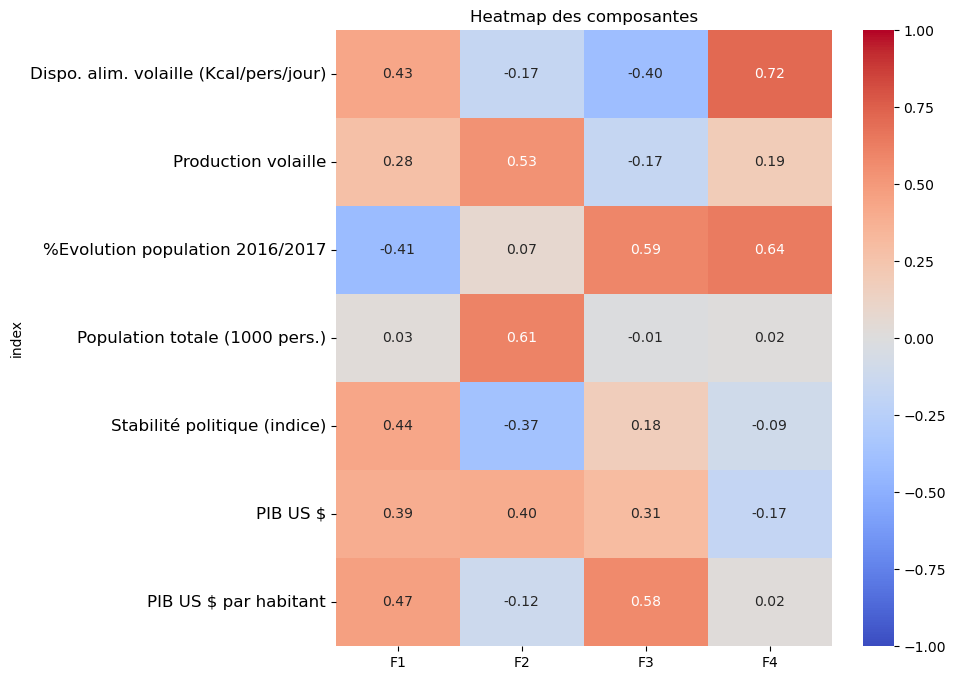

In [37]:
# Heatmap
import seaborn as sns
import textwrap

# Retour à la ligne des chaines de caractère trop longues en index
pcs_table_modif = pcs_table.copy()
pcs_table_modif = pcs_table_modif.reset_index()
pcs_table_modif.iloc[:,0] = pcs_table_modif.iloc[:,0].apply(lambda x: '\n'.join(textwrap.wrap(x, width=40)))
pcs_table_modif = pcs_table_modif.set_index(pcs_table_modif.columns[0])

# Représentation graphique
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(pcs_table_modif, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title("Heatmap des composantes")
plt.show()

In [38]:
# Fonction d'affichage des vecteurs des composantes principales

def correlation_graph(pca, 
                      x_y, 
                      features) : 
    
    """
    Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image
    fig, ax = plt.subplots(figsize=(11, 7))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.05,
                head_length=0.05, 
                width=0.01, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i], fontsize=8)
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an)) 

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [39]:
x_y = (0,1)

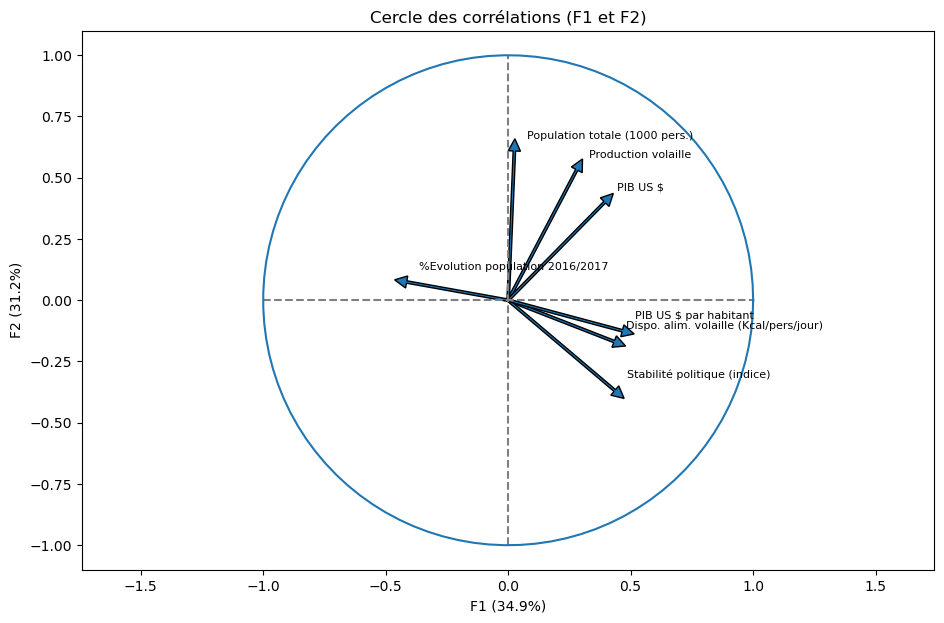

In [40]:
# Affichage du cercle des corrélations entre les composantes
correlation_graph(pca, x_y, features)

In [41]:
# Matrice de l'ACP
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns=["PC1","PC2","PC3", "PC4"])
display(X_proj.head())
X_proj.shape

,PC1,PC2,PC3,PC4
0,-2.892043,1.205261,0.156105,0.141439
1,0.800880,1.458015,-0.927439,1.277759
2,0.258923,-1.031327,-1.008394,-0.713038
3,-1.391769,0.699944,0.269343,-0.101967
4,3.958774,3.395088,2.088707,-1.068519


(165, 4)

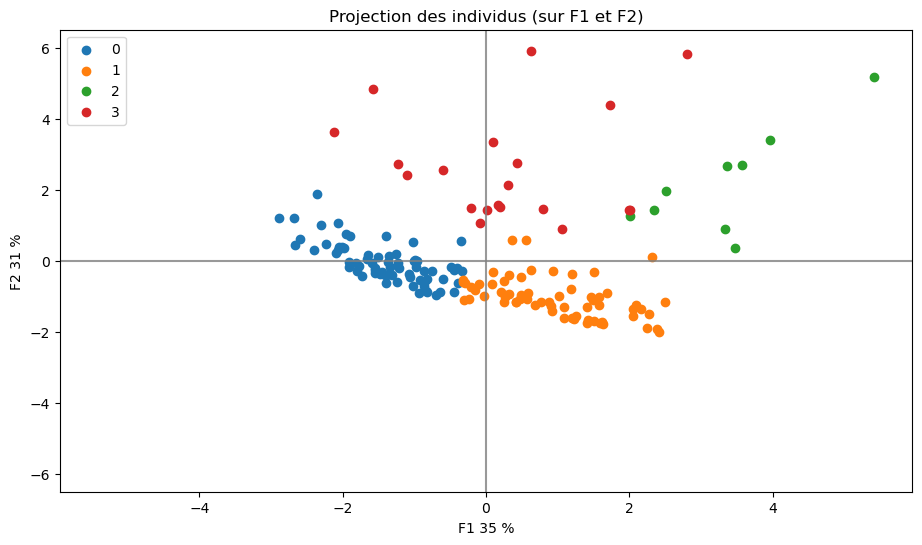

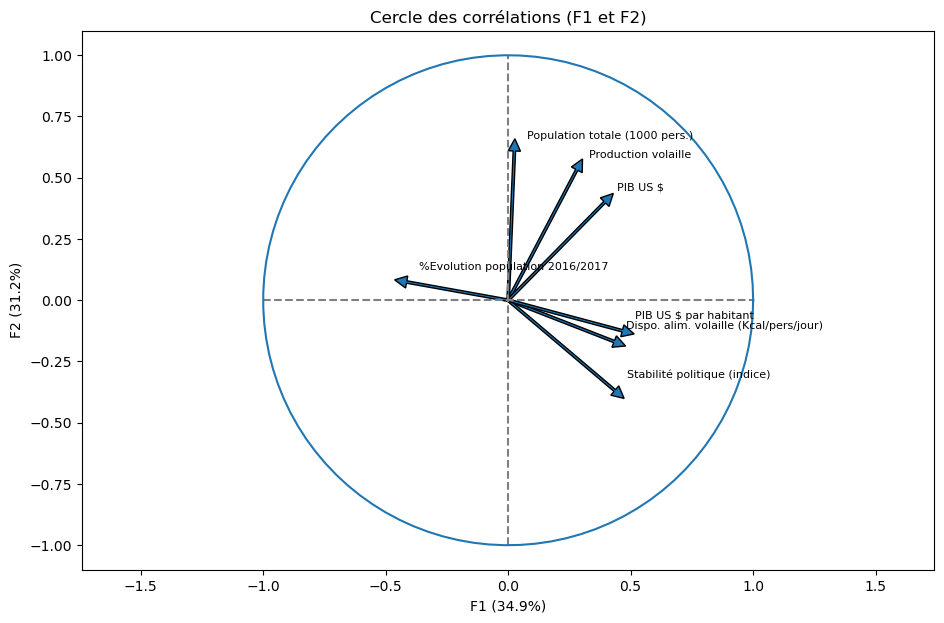

In [42]:
# Représentation graphique du clustering et du cercle des corrélations pour comparaison

# Nuage de points
display_factorial_planes(X_proj,  
                         x_y=(0,1), 
                         clusters=labels, 
                         pca=pca, 
                         figsize=(11, 6), 
                         alpha=1 )

# Cercle des corrélations
correlation_graph(pca, x_y, features) 

plt.show()

In [56]:
# Détermination des clusters
model_kmeans = KMeans(n_clusters=4, init="k-means++")
model_kmeans.fit(X_scaled)

# Déterminer les clusters auxquels appartiennent chaque point de données
clusters_predicted =  model_kmeans.fit_predict(X_scaled)

# Ajouter le numéro de cluster aux données à l’échelle originale
data_clustered = pd.DataFrame(X_scaled, index=data.index, columns=data.columns).reset_index()
data_clustered["cluster"] = clusters_predicted

data_clustered.head()

,Zone,Dispo. alim. volaille (Kcal/pers/jour),Production volaille,%Evolution population 2016/2017,Population totale (1000 pers.),Stabilité politique (indice),PIB US $,PIB US $ par habitant,cluster
0,Afghanistan,-1.143582,-0.528413,1.123546,0.270221,-3.026152,-0.388710,-0.686848,0
1,Afrique du Sud,1.206328,1.807614,0.118678,0.791765,-0.237610,0.188059,-0.363187,3
2,Albanie,0.218685,-0.549792,-1.200758,-0.543575,0.492723,-0.398074,-0.478264,1
3,Algérie,-0.854100,-0.176369,0.677909,0.406659,-0.945811,-0.147774,-0.498477,0
4,Allemagne,-0.019712,1.589547,-0.632789,1.437136,0.725102,5.462477,1.619728,2


In [59]:
clusters_predicted

array([0, 3, 1, 0, 2, 0, 1, 1, 3, 0, 2, 1, 0, 1, 3, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 3, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2,
       1, 0, 1, 1, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 3, 3, 0,
       1, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 3, 0,
       0, 0, 1, 0, 1, 0, 3, 0, 1, 0, 3, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 3,
       1, 0, 1, 3, 3, 1, 3, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 3, 3, 1,
       0, 1, 3, 0, 0, 0, 3, 1, 0, 0, 0])

In [61]:
# Liste des pays rangés par cluster
for k in range(0,4):
    liste_zone = data_clustered.loc[data_clustered["cluster"]==k, "Zone"].to_list()
    unique_values = set(liste_zone)
    n_zone = len(unique_values)
    print("\nCluster", k, "(", n_zone, "pays) :\n", liste_zone)


Cluster 0 ( 70 pays) :
 ['Afghanistan', 'Algérie', 'Angola', 'Arménie', 'Azerbaïdjan', 'Belize', 'Botswana', 'Burkina Faso', 'Bénin', 'Cambodge', 'Cameroun', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Eswatini', 'Gabon', 'Gambie', 'Ghana', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Honduras', 'Iraq', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Maroc', 'Mauritanie', 'Mongolie', 'Mozambique', 'Namibie', 'Nicaragua', 'Niger', 'Népal', 'Oman', 'Ouganda', 'Ouzbékistan', 'Paraguay', 'Rwanda', 'République centrafricaine', 'République démocratique populaire lao', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Sao Tomé-et-Principe', 'Sierra Leone', 'Soudan', 'Sri Lanka', 'Sénégal', 'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Tunisie', 'Turkménistan', 'Vanuatu', 'Yémen', 'Zambie', 'Zimbabwe', 'Équateur', 'Éthiopie', 'Îles Salomon']

Cluster 1 ( 66 pays) :
 ['Albanie', 'Antigu

# Recommandations d'exportations des volailles dans les pays appropriés

### Résultats:
Grâce au cercle des corrélations, nous pouvons rapprocher la population totale d'un pays, sa quantité de production en volaille et son niveau de PIB. Plus la population est importante, plus la production de volaille augmente et le niveau de richesse sur le territoire augmente de surcroît.

Un autre groupement de variables corrélées sont le PIB par habitant cette fois-ci, la disponibilité alimentaire en volaille et la stabilité politique. Dans un pays ou les habitants ont un niveau de vie de qualité, la disponibilité alimentaire est importante et la stabilité politique est bonne avec peu de violences.

L'évolution de la population représente une autre composante qui évolue dans une direction différente des groupes précédemment cités. Par exemple une population qui augmente va à l'encontre d'une stabilité politique ainsi que d'un niveau de vie suffisant pour ses habitants. Autrement dit une population importante est plus instable en terme de sécurité et de qualité de vie.


### Recommandations:
En ayant identifié les variables corrélées, nous pouvons étudier leurs comportements respectifs.

Nous observons que plus la population augmente dans un pays, moins la disponibilité alimentaire en viandes de volaille est importante. Il y a une notion de partage des ressources entre les habitants. Toujours avec cette considération, nous constatons que le PIB par habitants diminue, même si le PIB total du pays reste fort, il s'agit d'un partage des richesses inégal avec la population.

Par ailleurs, plus la population d'un pays augmente, plus la stabilité politique diminue, cela exprime le fait qu'il y a plus de risque d'insécurité pour une population plus grande.

Concrètement, en comparant les composantes avec le nuage de point, nous pouvons identifier les pays dans lesquelles exporter nos viandes de volaille selon des critères définis.

Si nous souhaitons exporter vers les pays dont la population est élevée et dont les disponibilités alimentaires de volailles sont faibles, nous nous confronterons à une stabilité politique moins bonne. Il s'agit des pays du cluster 3.

Si nous souhaitons cibler des pays dont la population est importante mais avec plus de disponibilité alimentaire, un PIB national plus élevé et une meilleure stabilité politique pour la sécurité de nos exportations, il s’agit des pays du cluster 2.

De manière moins nuancée, nous retrouvons les pays qui possèdent une population plus faible qui n’a pas augmentée, avec une disponibilité alimentaire et un PIB moyen, il s’agit du cluster 1.

Selon une autre constatation, nous retrouvons les pays dont la population a augmenté et où la disponibilité alimentaire est faible, cependant le PIB par habitant et la stabilité politique sont les plus bas. Ce sont les pays du cluster 0.